
# Rede de Varejo - EUA


Este é o segundo projeto do curso ["Fundamentos de linguagem Python para análise de dados"](https://www.datascienceacademy.com.br/course/fundamentos-de-linguagem-python-para-analise-de-dados-e-data-science) disponível na plataforma da [DSA](https://www.datascienceacademy.com.br/start) (Data Science Academy).


O objetivo é responder dez perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.


Os dados são reais e foram extraídos do [Tableau](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls).


In [49]:
from math import ceil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
df = pd.read_csv(
    filepath_or_buffer='./Sample-Superstore.csv', 
    sep=',', 
    encoding='UTF-8', 
    header=0,
    parse_dates=['Order Date', 'Ship Date']
)

In [52]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Pergunta de negócio 1


Qual **cidade** com **maior valor** de **venda** de produtos da **categoria** *'Office Supplies'*?

In [53]:
(
    df[['City', 'Category', 'Sales']]
    .query('Category == "Office Supplies"')
    .sort_values(by='Sales', ascending=False)
    .head(1)
)

,City,Category,Sales
9039,Detroit,Office Supplies,9892.74


## Pergunta de negócio 2

Qual o **total de vendas** por **data do pedido**? Demonstre o resultado através de um **gráfico de barras**.

In [54]:
years_sales = (
    df.groupby(by=df['Order Date'].dt.year.astype(str))
    .aggregate({'Sales': 'sum'})
    .reset_index()
    .rename(
        columns={
            'Order Date':'Year', 
            'Sales': 'Total Sales'
        }
    )
)

In [55]:
years_sales

,Year,Total Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


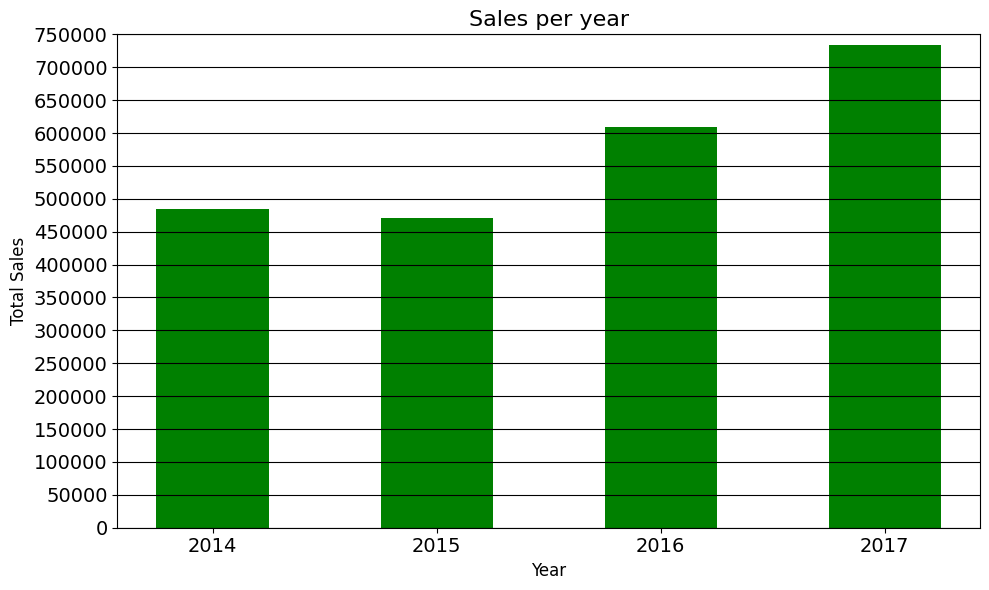

In [56]:
plt.figure(figsize=(10,6))

plt.bar(
    x=years_sales['Year'], 
    height=years_sales['Total Sales'], 
    align='center', 
    color='green', 
    width=0.5
)

plt.title(
    label='Sales per year', 
    fontsize=16
)

plt.xlabel(
    xlabel='Year', 
    fontsize=12
)

plt.ylabel(
    ylabel='Total Sales', 
    fontsize=12
)

plt.xticks(fontsize=14)

plt.yticks(
    ticks=np.arange(0, years_sales['Total Sales'].max() + 50000, 50000), 
    fontsize=14
)

plt.ylim(
    ymin=0,
    ymax=50000 * ceil(years_sales['Total Sales'].max() / 50000)
)

plt.grid(
    visible=True, 
    axis='y', 
    color='black'
)

plt.tight_layout()

plt.show()

In [57]:
del years_sales

Obs.: Plotei o gráfico das vendas por ano do pedido para melhor visualização.

## Pergunta de negócio 3


Qual o **total de vendas** por **estado**? Demonstre o resultado através de um **gráfico de barras**.

In [58]:
states_sales = (
    df.groupby(by='State')
    .aggregate({'Sales': 'sum'})
    .reset_index()
    .rename(columns={'Sales':'Total Sales'})
)

In [59]:
states_sales

,State,Total Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180
5,Connecticut,13384.3570
6,Delaware,27451.0690
7,District of Columbia,2865.0200
8,Florida,89473.7080
9,Georgia,49095.8400


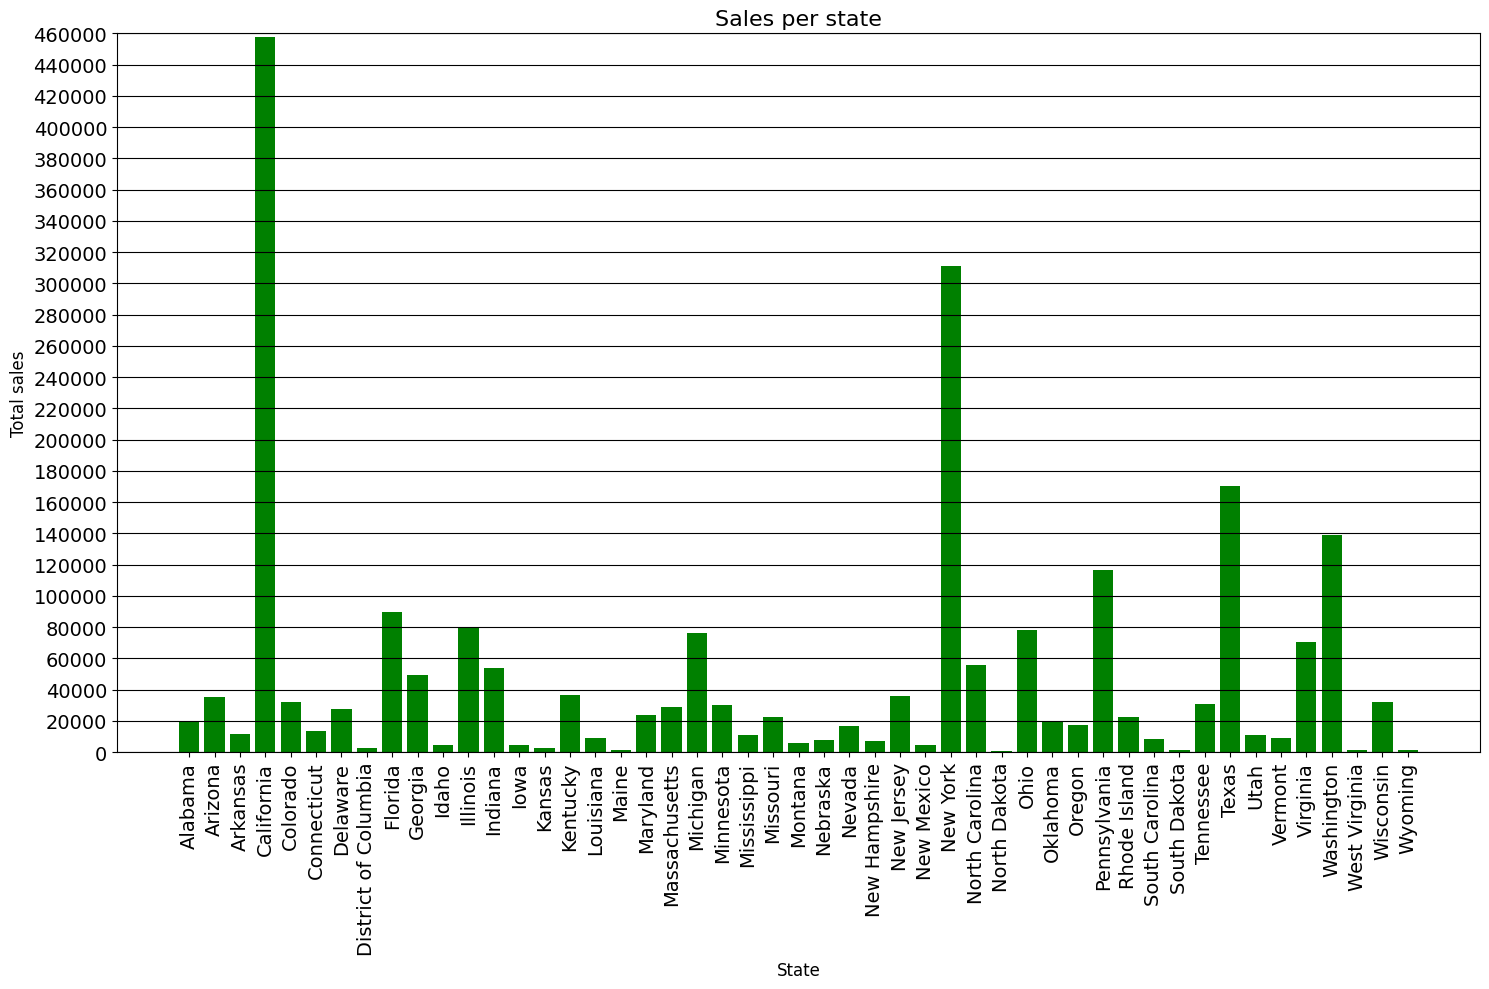

In [60]:
plt.figure(figsize=(15,10))

plt.bar(
    x=states_sales['State'], 
    height=states_sales['Total Sales'], 
    align='center', 
    color='green', 
    width=0.8
)

plt.title(
    label='Sales per state', 
    fontsize=16
)

plt.xlabel(
    xlabel='State', 
    fontsize=12
)

plt.ylabel(
    ylabel='Total sales', 
    fontsize=12
)

plt.xticks(
    ticks=states_sales['State'], 
    rotation=90, 
    ha='center', 
    fontsize=14
)

plt.yticks(
    ticks=np.arange(0, states_sales['Total Sales'].max() + 20000, 20000), 
    fontsize=14
)

plt.ylim(
    ymin=0,
    ymax=20000 * ceil(states_sales['Total Sales'].max() / 20000)
)

plt.grid(
    visible=True,
    axis='y',
    color='black'
)

plt.tight_layout()

plt.show()

In [61]:
del states_sales

## Pergunta de negócio 4


Quais são as **10 cidades** com **maior total de vendas**? Demonstre o resultado através de um **gráfico de barras**.

In [62]:
city_sales = (
    df.groupby(by='City')
    .aggregate({'Sales': 'sum'})
    .reset_index()
    .rename(columns={'Sales': 'Total Sales'})
    .sort_values(by='Total Sales', ascending=False)
    .head(10)
)

In [63]:
city_sales

,City,Total Sales
329,New York City,256368.1610
266,Los Angeles,175851.3410
452,Seattle,119540.7420
438,San Francisco,112669.0920
374,Philadelphia,109077.0130
207,Houston,64504.7604
80,Chicago,48539.5410
437,San Diego,47521.0290
216,Jacksonville,44713.1830
464,Springfield,43054.3420


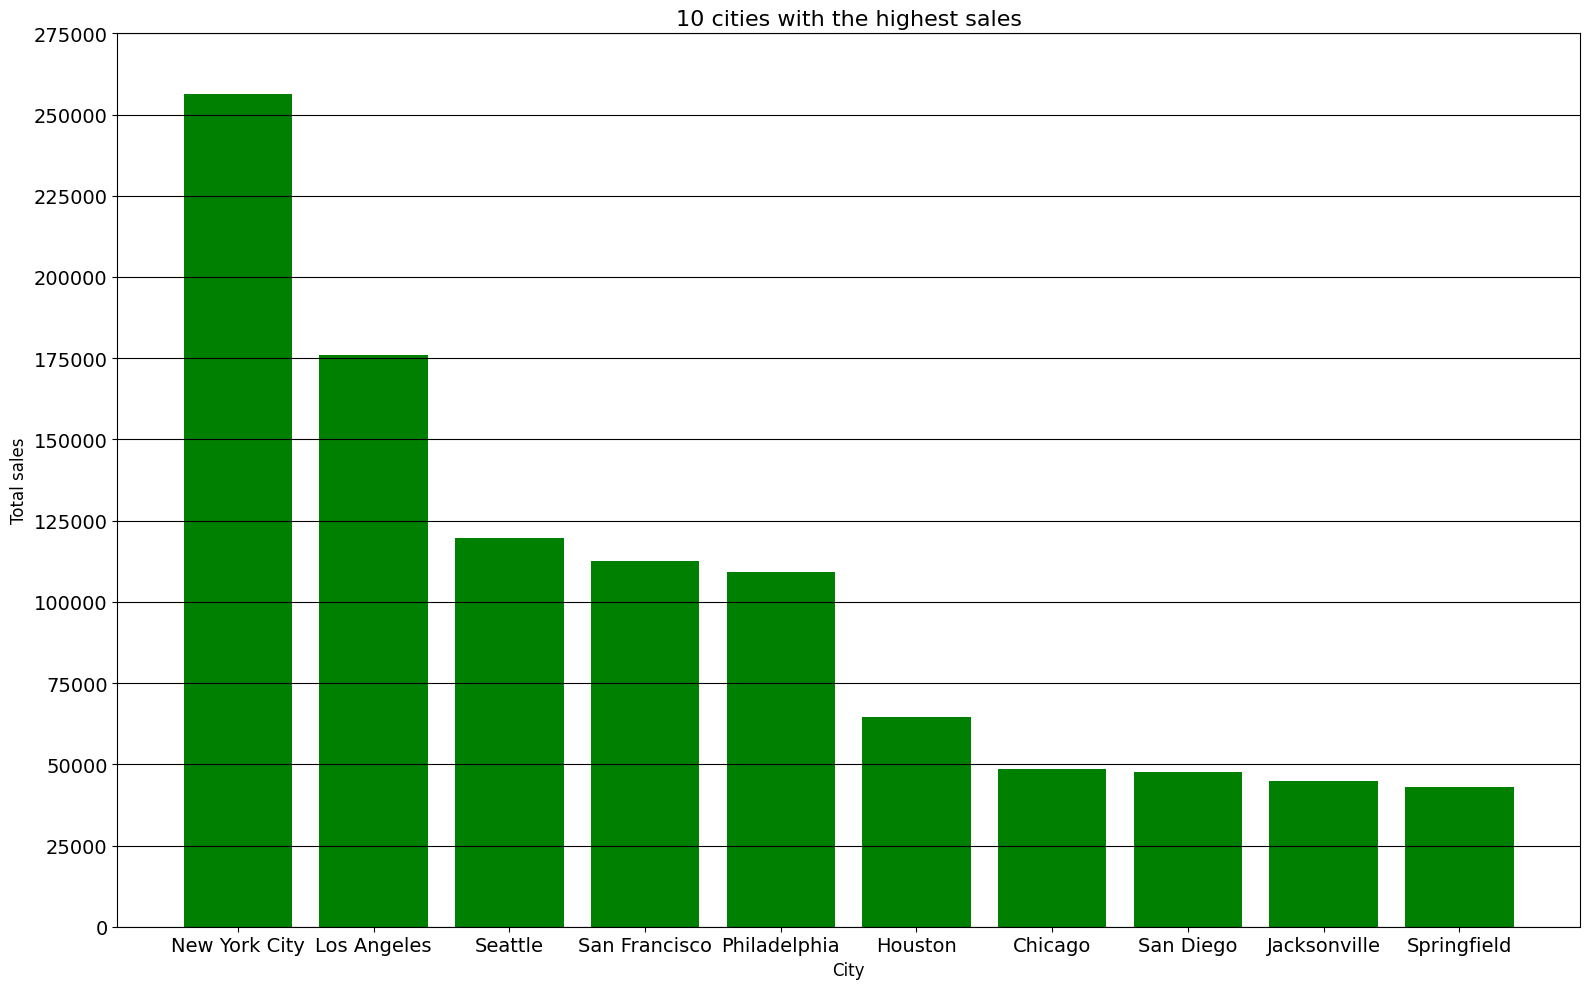

In [64]:
plt.figure(figsize=(16, 10))

plt.bar(
    x=city_sales['City'], 
    height=city_sales['Total Sales'], 
    align='center', 
    color='green', 
    width=0.8
)

plt.title(
    label='10 cities with the highest sales', 
    fontsize=16
)

plt.xlabel(
    xlabel='City', 
    fontsize=12
)

plt.ylabel(
    ylabel='Total sales', 
    fontsize=12
)

plt.xticks(fontsize=14)

plt.yticks(
    ticks=np.arange(0, city_sales['Total Sales'].max() + 25000, 25000), 
    fontsize=14
)

plt.ylim(
    ymin=0,
    ymax=25000 * ceil(city_sales['Total Sales'].max() / 25000)
)

plt.grid(
    visible=True,
    axis='y',
    color='black'
)

plt.tight_layout()

plt.show()

In [65]:
del city_sales

## Pergunta de negócio 5


Qual **segmento** teve o **maior total de vendas**? Demonstre o resultado através de um **gráfico de pizza**.

In [66]:
segments_sales = (
    df.groupby(by='Segment')
    .aggregate({'Sales': 'sum'})
    .reset_index()
    .rename(columns={'Sales': 'Total Sales'})
)

In [67]:
segments_sales

,Segment,Total Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


In [68]:
def funcao_autopct(val, colunas):
    valor_absoluto = int(val/100 *  sum(colunas))
    return f'{val:.1f}%\n($ {valor_absoluto:,})'

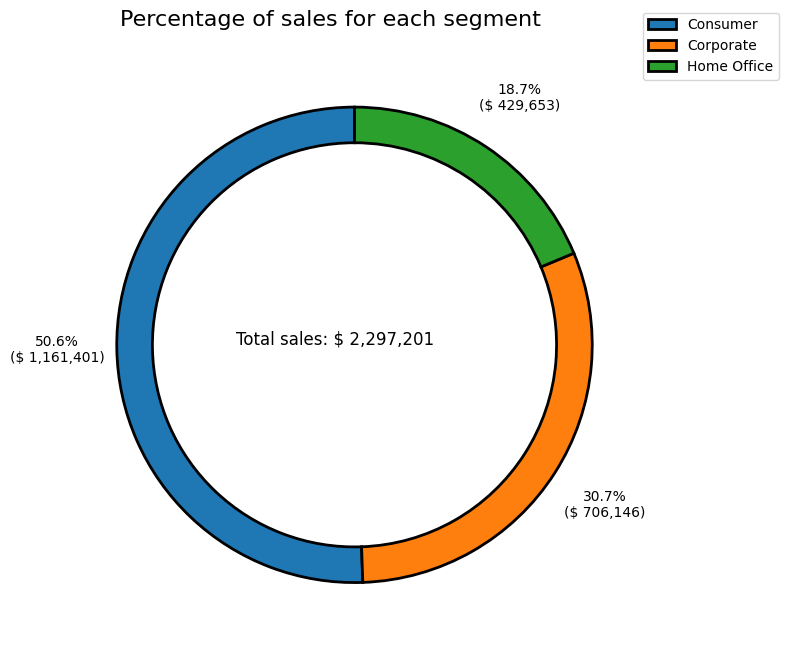

In [69]:
fig, ax = plt.subplots(
    figsize=(6.5, 6.5),
    layout='constrained'
)

ax.pie(
    x=segments_sales['Total Sales'], 
    labels=None,
    pctdistance=1.25,
    autopct=lambda pct: funcao_autopct(pct, segments_sales['Total Sales']),
    startangle=90, 
    counterclock=True,
    wedgeprops={
        'width': 0.15,
        'edgecolor': 'black',
        'linewidth': 2,
        'linestyle': 'solid',
        'antialiased': True
    }
)

fig.suptitle(
    t='Percentage of sales for each segment', 
    fontsize=16
)

fig.legend(
    labels=segments_sales['Segment'],
    loc='upper right',
    bbox_to_anchor=(1.2, 1)
)

plt.annotate(text=f'Total sales: $ {sum(segments_sales['Total Sales']):,.0f}', xy=(0, 0), xytext=(-.5, 0), fontsize=12)

plt.show()

In [70]:
del segments_sales

## Pergunta de negócio 6


Qual o **total de vendas** por **segmento** e por **ano**?

In [71]:
df_temp = (
    df.groupby(
        by=[
            'Segment',
            df['Order Date'].dt.year
        ]
    )
    .aggregate({'Sales':'sum'})
    .rename(columns={'Sales': 'Total Sales'})
)

In [72]:
(
    df_temp.index
    .set_names(
        names=[
            'Segment',
            'Year'
        ],
        inplace=True
    )
)

In [73]:
df_temp

Total Sales
Segment     Year             
Consumer    2014  266096.8126
            2015  266535.9333
            2016  296863.8992
            2017  331904.6999
Corporate   2014  128434.8737
            2015  128757.3069
            2016  207106.3618
            2017  241847.8244
Home Office 2014   89715.8118
            2015   75239.2688
            2016  105235.3370
            2017  159462.7309

## Pergunta de negócio 7


Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:
- Se o **Valor_Venda** for **maior que 1000** recebe **15% de desconto**.
- Se o **Valor_Venda** for **menor que 1000** recebe **10% de desconto**.


**Quantas vendas** receberiam **15% de desconto**?

In [74]:
df_temp = df.copy()

In [75]:
df_temp['Discount Sales'] = np.where(df_temp['Sales'] > 1000.0, '15%', '10%')

In [76]:
df_temp.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discount Sales
4822,4823,CA-2016-134222,2016-07-10,2016-07-11,Same Day,NZ-18565,Nick Zandusky,Home Office,United States,Yuma,Arizona,85364,West,OFF-BI-10001658,Office Supplies,Binders,GBC Standard Therm-A-Bind Covers,44.856,6,0.7,-35.8848,10%
4940,4941,CA-2015-156482,2015-02-06,2015-02-13,Standard Class,IL-15100,Ivan Liston,Consumer,United States,Wilmington,Delaware,19805,East,FUR-CH-10001708,Furniture,Chairs,Office Star - Contemporary Swivel Chair with P...,1268.820,9,0.0,266.4522,15%
7300,7301,CA-2014-163468,2014-11-18,2014-11-21,First Class,JK-15730,Joe Kamberova,Consumer,United States,Des Plaines,Illinois,60016,Central,FUR-BO-10003546,Furniture,Bookcases,Hon 4-Shelf Metal Bookcases,424.116,6,0.3,-30.2940,10%
172,173,CA-2014-118962,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,United States,Los Angeles,California,90004,West,OFF-PA-10001144,Office Supplies,Paper,Xerox 1913,110.960,2,0.0,53.2608,10%
1205,1206,CA-2017-133235,2017-08-01,2017-08-04,First Class,LH-16750,Larry Hughes,Consumer,United States,Charlotte,North Carolina,28205,South,TEC-PH-10002660,Technology,Phones,Nortel Networks T7316 E Nt8 B27,271.960,5,0.2,16.9975,10%


In [77]:
df_temp['Discount Sales'].value_counts()

Discount Sales
10%    9526
15%     468
Name: count, dtype: int64

## Pergunta de negócio 8


Considere  que  a  empresa  decida  **conceder  o  desconto  de  15%**  do  item  anterior. Qual seria a **média do valor de venda** **antes** e **depois** do desconto?

In [78]:
round(df_temp['Sales'].mean(), 2)

229.86

In [79]:
df_temp.loc[df_temp['Discount Sales'] == '15%', 'Sales'] = df_temp['Sales'] - df_temp['Sales'] * 0.15

In [80]:
round(df_temp['Sales'].mean(), 2)

215.0

In [81]:
del df_temp

## Pergunta de negócio 9


Qual a **média de vendas** por **segmento**, por **ano** e por **mês**? Demonstre o resultado através do **gráfico de linha**.

In [82]:
avg_sales = (
    df.groupby(
        by=[
            'Segment',
            df['Order Date'].dt.year.astype(str),
            df['Order Date'].dt.month,
            df['Order Date'].dt.strftime('%b').astype(str)
        ]
    )
    .aggregate({'Sales': 'mean'})
    .rename(columns={'Sales': 'AVG Sales'})
)

In [83]:
(
    avg_sales
    .index
    .set_names(
        names=[
            'Segment', 
            'Year', 
            'Month Number', 
            'Month'
        ], 
        inplace=True
    )
)

In [84]:
avg_sales = avg_sales.droplevel('Month Number')

In [85]:
avg_sales

AVG Sales
Segment     Year Month            
Consumer    2014 Jan    141.384020
                 Feb    117.327926
                 Mar    152.170564
                 Apr    189.762750
                 May    180.551592
...                            ...
Home Office 2017 Aug    176.160606
                 Sep    245.732667
                 Oct    412.576597
                 Nov    245.037592
                 Dec    221.566627

[144 rows x 1 columns]

In [86]:
avg_sales.reset_index(inplace=True)

In [87]:
years = avg_sales['Year'].unique().reshape(2, 2)

In [88]:
years

array([['2014', '2015'],
       ['2016', '2017']], dtype=object)

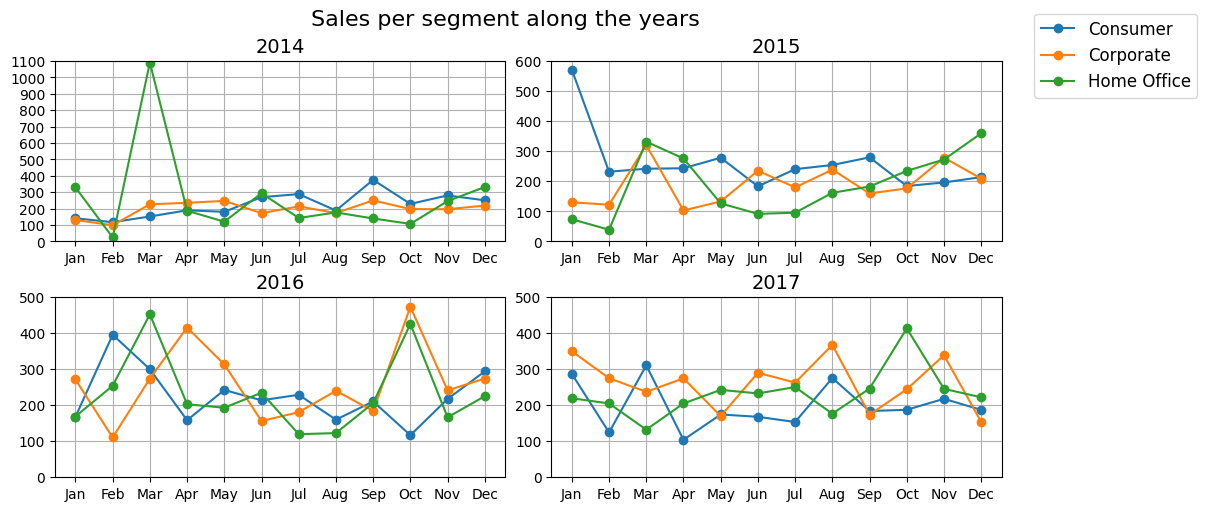

In [89]:
fig, ax = plt.subplots(
    nrows=2, 
    ncols=2, 
    figsize=(10, 5),
    layout='constrained'
)

for i in range(0, 2):
    for j in range(0, 2):
        year = years[i, j]
        max_sale = avg_sales.query('Year == @year')['AVG Sales'].max()
        
        for segment in avg_sales['Segment'].unique():
            temp_df = avg_sales.query('Year == @year and Segment == @segment')
            
            ax[i, j].plot(
                temp_df['Month'], 
                temp_df['AVG Sales'],
                marker='o'
            )
            
            ax[i, j].set_title(
                label=f'{year}', 
                fontsize=14
            )
            
            ax[i, j].set_yticks(np.arange(0, max_sale + 100, 100))
            
            ax[i, j].set_ylim(
                ymin=0, 
                ymax=100 * ceil(max_sale / 100)
            )
            
            ax[i, j].grid(True)

fig.suptitle(
    t='Sales per segment along the years', 
    fontsize=16)

fig.legend(
    labels=avg_sales['Segment'].unique(),
    loc='upper right',
    bbox_to_anchor=(1.2, 1),
    fontsize=12
)

plt.show()


In [90]:
del avg_sales

## Pergunta de negócio 10


Qual o **total de vendas** por **categoria** e **sub-categoria**, considerando **somente as top 12 sub-categorias**? Demonstre tudo através de um **único gráfico**.

In [91]:
df_temp = (
    df.groupby(
        by=[
            'Category', 
            'Sub-Category'
        ]
    )
    .aggregate({'Sales': 'sum'})
    .rename(columns={'Sales': 'Total Sales'})
    .sort_values(by='Total Sales', ascending=False)
    .head(12)
    .sort_values(by='Category')
)

In [92]:
df_temp

Total Sales
Category        Sub-Category             
Furniture       Chairs        328449.1030
                Tables        206965.5320
                Bookcases     114879.9963
                Furnishings    91705.1640
Office Supplies Storage       223843.6080
                Binders       203412.7330
                Appliances    107532.1610
                Paper          78479.2060
Technology      Phones        330007.0540
                Machines      189238.6310
                Accessories   167380.3180
                Copiers       149528.0300

In [93]:
df_temp.reset_index(inplace=True)

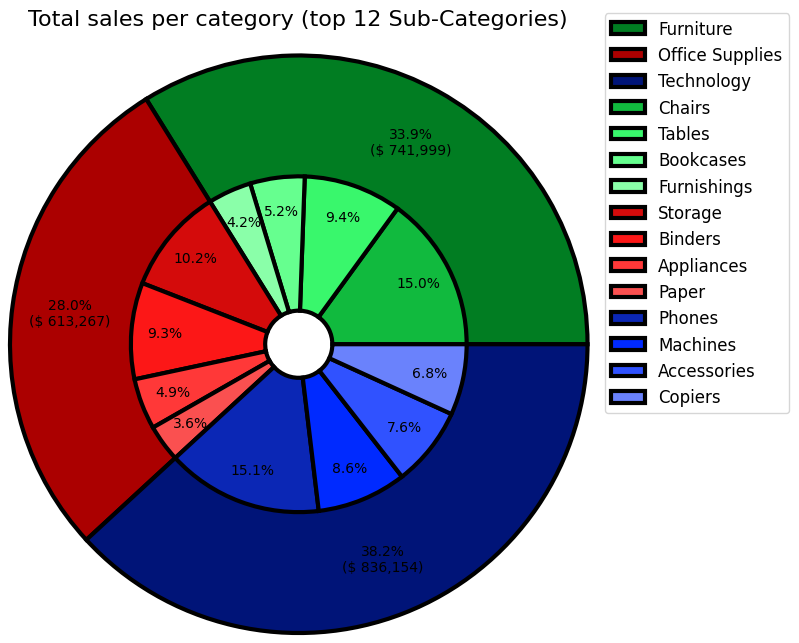

In [94]:
cmap = plt.colormaps['Spectral']


outer_colors = ['#017d22', '#ab0000', '#001478']
inner_colors = [
    '#11ba3e', '#39f76c', '#66ff8f', '#8affa9', 
    '#d40b0b', '#fc1717', '#ff3838', '#fa5050', 
    '#0b27b5', '#002aff', '#3052ff', '#6a82fc'
]

fig, ax = plt.subplots(
    figsize=(5, 6.5),
    layout='constrained'
)

ax.pie(
    x= df_temp.groupby(by='Category')['Total Sales'].sum(),
    labels=None,
    pctdistance=.80,
    radius=2.15,
    counterclock=True,
    autopct=lambda pct: funcao_autopct(pct, df_temp.groupby(by='Category')['Total Sales'].sum()),
    colors=outer_colors,
    wedgeprops={
        'width': 1.5,
        'linewidth': 3,
        'edgecolor': 'black'
    }
)

ax.pie(
    x=df_temp['Total Sales'].values,
    labels=None,
    radius=1.25,
    counterclock=True,
    autopct='%1.1f%%',
    pctdistance=.80,
    colors=inner_colors,
    wedgeprops={
        'width': 1,
        'linewidth': 3,
        'edgecolor': 'black'
    }
)

fig.suptitle(
    t='Total sales per category (top 12 Sub-Categories)',
    fontsize=16
)

fig.legend(
    labels=np.concatenate((df_temp['Category'].unique(), df_temp['Sub-Category'].unique())),
    loc='upper right',
    bbox_to_anchor=(1.5, 1),
    fontsize=12
)

plt.show()

In [95]:
del df_temp